In [10]:
import autoreg
import GPy
import numpy as np
import scipy.io
from pylab import *
%matplotlib inline

In [11]:
def comp_RMSE(a,b):
    return np.sqrt(np.square(a-b).mean())

In [12]:
data = scipy.io.loadmat('./identificationExample.mat')
data_in = data['u'][:,None]
data_out = data['y'][:,None]
win_in = int(data['lu'])
win_out = int(data['ly'])
data_in_train = data_in[:150]
data_out_train = data_out[:150]
data_in_test = data_in[150:]
data_out_test = data_out[150:]

In [13]:
# One hidden layer
m = autoreg.DeepAutoreg([0,win_out],data_out_train, U=data_in_train, U_win=win_in,X_variance=0.01,
                        num_inducing=50)
m.layer_0.likelihood.variance[:] = data_out_train.var()*0.01
m.layer_1.likelihood.variance[:] = 0.01
m.layer_0.likelihood.fix(warning=False)
m.layer_1.likelihood.fix(warning=False)

array([0])

In [14]:
print m


Name                              : autoreg
Log-likelihood                    : -2161.86369133
Number of Parameters              : 457
Number of Optimization Parameters : 455
Updates                           : True
Parameters:
  autoreg.                         |        Value        |  Constraint  |  Prior  |  Tied to
  layer_1.inducing inputs          |            (50, 2)  |              |         |         
  layer_1.rbf.variance             |                1.0  |     +ve      |         |         
  layer_1.rbf.lengthscale          |               (2,)  |     +ve      |         |         
  layer_1.Gaussian_noise.variance  |               0.01  |    fixed     |         |         
  layer_1.latent space.mean        |           (150, 1)  |              |         |         
  layer_1.latent space.variance    |           (150, 1)  |     +ve      |         |         
  layer_0.inducing inputs          |            (50, 1)  |              |         |         
  layer_0.rbf.variance     

In [15]:
m.optimize(messages=1,max_iters=50)
m.layer_0.likelihood.constrain_positive(warning=False)
m.layer_1.likelihood.constrain_positive(warning=False)
m.optimize(messages=1,max_iters=1000)

In [16]:
m.layer_1.kern.lengthscale

Index,autoreg.layer_1.rbf.lengthscale,Constraint,Prior,Tied to
[0],18.0053735574,+ve,,N/A
[1],1.9266584764,+ve,,N/A


In [17]:
m.layer_0.kern.lengthscale

Index,autoreg.layer_0.rbf.lengthscale,Constraint,Prior,Tied to
[0],16.7517835311,+ve,,N/A


0.0343348510442


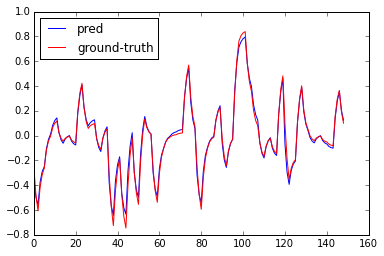

In [18]:
pd = m.freerun(U=data_in_test)
_=plot(pd,'b',label='pred')
_=plot(data_out_test[1:],'r',label='ground-truth')
legend(loc='best')
print comp_RMSE(pd,data_out_test[1:])